Monitoring of soil drying under winter wheat
=======
(updated on 2020-12-03)

## Context
To ensure our food security while
This notebook shows how time-lapse electrical resistivity tomography (ERT) can help to follow the soil drying (mainly driven by root water uptake) during the growth season. Geophysical tools has proven useful to monitor water movement in the subsurface [(Binley et al., 2015)](https://doi.org/10.1002/2015WR017016). From an agronomical point of view, imaging the depth and extent of water drying by the roots is a relevant traits for crop breeders to select new variety. Indeed, we can expect that a crop able to take water deeper will be more resistant to drought. Using time-lapse geophysics (ERT and FDEM), [(Shanahan et al., 2015)](https://doi.org/10.2136/sssaj2014.09.0360) were able to image differences between a few winter wheat varieties.[(Whalley et al., 2017)](https://doi.org/10.1007/s11104-016-3161-1) further expanded to larger number of varieties used and compared the geophysical methods with other more traditional approaches (neutron probe, penetrometer). However, field heterogeneity can, under some circumstances, hinder the power of geophysics to rank the varieties. This was investigated by [(Blanchy et al., 2020a)](https://doi.org/10.1002/vzj2.20037). The data presented in this notebook have been collected during this study.

## Materials and Methods
This dataset was collected on 24 pins array (0.25 m electrode spacing) using a dipole-dipole sequence with a Syscal Pro 48 (Iris Instruments, Orléans, France). The experiment took place at [Worburn (UK)](https://www.google.com/maps/place/Woburn,+Milton+Keynes,+UK/@52.017746,-0.5941597,490m/data=!3m1!1e3!4m5!3m4!1s0x487652e28c85f5dd:0x37055c5a77f68c64!8m2!3d51.987703!4d-0.6209209?hl=en), a research station managed by Rothamsted Research in 2017 under winter wheat [(Blanchy et al., 2020a)](https://doi.org/10.1002/vzj2.20037).

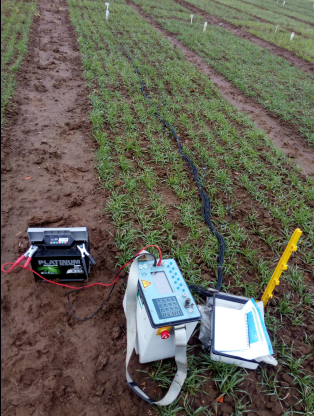

Photo of one plot in February 2017.

The processing of the ERT data was done using [ResIPy](https://gitlab.com/hkex/resipy) Python API [(Blanchy et al., 2020b)](https://doi.org/10.1016/j.cageo.2020.104423) that is based upon R* codes [(Binley, 2005)](http://www.sciencedirect.com/science/article/pii/B9780444538024001925).

In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../../../../resipy/src/')
from resipy import Project
datadir = '../data/blanchy/dc-2d-timelapse/data/'

API path =  /media/jkl/data/phd/tmp/resipy/src/resipy
ResIPy version =  3.0.3
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


In [2]:
k = Project(typ='R2') # initiate a Project instance for 2D DC survey (using R2 code)
k.createTimeLapseSurvey([datadir + '17030207.csv',
                         datadir + '17042705.csv',
                         datadir + '17062304.csv'], ftype='Syscal')
k.filterUnpaired() # remove dummy quadrupoles added to make dipole-dipole faster

Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname
3/3 imported
removeUnpaired:removeUnpaired:removeUnpaired:

108

Text(0.5, 1.0, '(c) 2017-06-23')

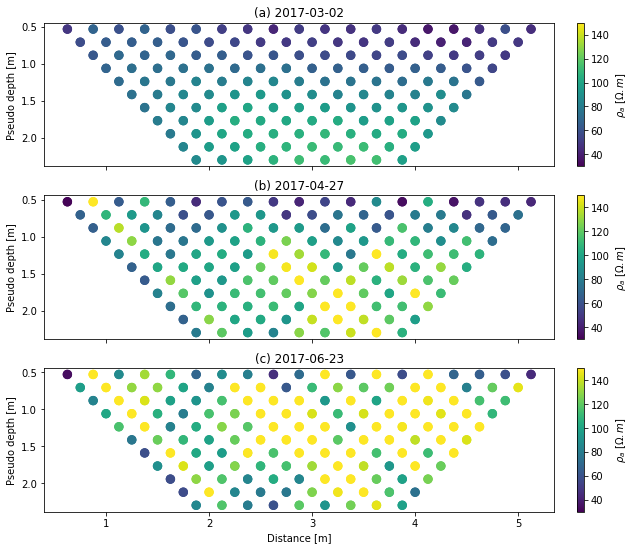

In [3]:
fig, axs = plt.subplots(3, 1, figsize=(10, 9), sharex=True)
ax = axs[0]
k.showPseudo(index=0, ax=ax, vmin=30, vmax=150)
ax.set_title('(a) 2017-03-02')
ax.set_xlabel('')
ax = axs[1]
k.showPseudo(index=1, ax=ax, vmin=30, vmax=150)
ax.set_title('(b) 2017-04-27')
ax.set_xlabel('')
ax = axs[2]
k.showPseudo(index=2, ax=ax, vmin=30, vmax=150)
ax.set_title('(c) 2017-06-23')

### Error modelling
Inside the inversion routine, each measurement is given a weight related to the error of the measurement. As the sequence used contains both 'normal' and 'reciprocal' quadrupoles, we can compute a reciprocal error as:
$ R_{error} = |R_{normal} - R_{reciprocal}| $.
Using the mean resistance measured as:
$ R_{avg} = \frac{|R_{normal} + R_{reciprocal}|}{2}$
we can fit a power-law error model of the type $R_{error} = a * R_{avg}^b$. This model is fitted in a logarithmic space (a power-law fit looks like a linear fit in log space). To make the fit (red line) more robust, measurements (blue plus) are grouped bins of which the mean is computed (orange dots). This 
This is implemented in the method `fitErrorPwl()` where the `index=-2` argument specifies that the model will be done on the combined data of all surveys.

Error model is R_err = 0.008 R_avg^1.036 (R^2 = 0.936)


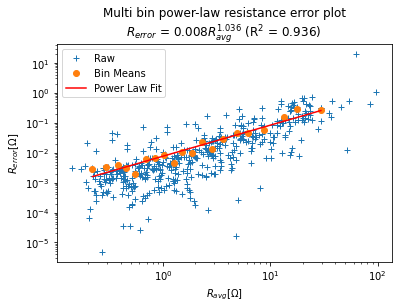

In [4]:
k.fitErrorPwl(index=-2) # fit a power-law error model for all dataset aggregated

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Creating triangular mesh...Reading mesh.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Triangle
Reading connection matrix...
ignoring 0 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
Done
ResIPy Estimated RAM usage = 0.021371 Gb
done


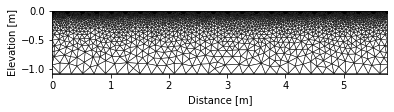

In [5]:
k.createMesh(typ='trian', cl=0.01, cl_factor=20, show_output=False) # create a triangular mesh with a characteristic length of 0.5
k.showMesh() # display the mesh

In [6]:
k.err = False
k.invert(parallel=True) # run the inversion (and write R2.in and protocol.dat automatically)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Writing .in file and protocol.dat... Matching quadrupoles between surveys for difference inversion...308 in common...done in 0.014044s
done!
------------ INVERTING REFERENCE SURVEY ---------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.02 <<

 >> D a t e : 14 - 12 - 2020
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:   154     Measurements rejected:     0
   Geometric mean of apparent resistivities

## Results
By comparing the relative difference in resistivity ($\frac{\Delta \rho}{\rho_{March}}$ in %) between (a) March-April and (b) March-May. We can observe larger and deeper soil increase of resistivity associated with larger soil drying from plants water uptake.

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


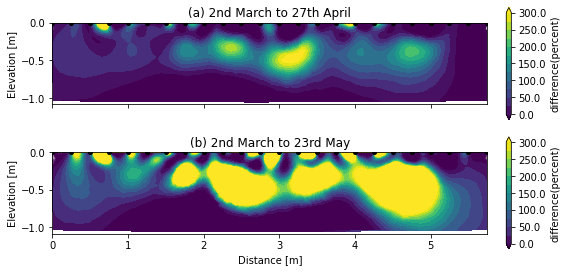

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
ax = axs[0]
ax.set_title('(a) 2nd March to 27th April')
k.showResults(ax=ax, index=1, attr='difference(percent)', vmin=0, vmax=300, contour=True)
ax.set_xlabel(None)
ax = axs[1]
ax.set_title('(b) 2nd March to 23rd May')
k.showResults(ax=ax, index=2, attr='difference(percent)', vmin=0, vmax=300, contour=True)
fig.tight_layout()